# Sales Analysis

Introduction

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

---------------

### Notebook Content
[1)Exploring data](#another_cell)

[2)Cleaning & Adjusting Data](#another_cell2)

[3)Answering Questions](#another_cell3)

[4)Findings](#another_cell4)

------------------

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# collect data and put it in one dataframe
base_df = pd.read_csv(r"C:\\Users\Monged\Desktop\Sales Analysis\Sales_April_2019.csv")
for filename in os.listdir(r"C:\\Users\Monged\Desktop\Sales Analysis"):
    if filename[-3:] == 'csv'and filename != 'Sales_April_2019.csv':
        
        df_read = pd.read_csv(filename)
        base_df = pd.concat([base_df,df_read])

In [3]:
base_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [20]:
list=[]
for filename in os.listdir(r"C:\\Users\Monged\Desktop\Sales Analysis"):
    if filename[-3:] == 'csv':
        df_test = pd.read_csv(filename)
        list.append(df_test.shape[0])
sum(list)

186850

In [21]:
df = base_df

## <a id='another_cell'> 1. Exploring data </a>

 _____________________________________________________________________

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


###### <font color=green>Data type need to be changed as all are string</font>

In [23]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


###### <font color=green>There are 545 null rows</font>

In [24]:
# Show null rows
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [26]:
df.groupby(df.Product).count()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address
Product,,,,,
20in Monitor,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800


###### <font color=green>There is a product called product!! which make no sence</font>

In [27]:
df[df.Product == 'Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


###### <font color=green>there are rows where their values are the same as the name of the column represented, they are redundant.</font>

In [28]:
df[['Order Date','Purchase Address']]

,Order Date,Purchase Address
0,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN
2,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...
11681,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


###### <font color=green>Data and address columns need to be splitted </font>

In [29]:
df[['Quantity Ordered','Price Each']]

,Quantity Ordered,Price Each
0,2,11.95
1,NaN,NaN
2,1,99.99
3,1,600
4,1,11.99
...,...,...
11681,3,2.99
11682,1,700
11683,1,700
11684,1,379.99


###### <font color=green>A total price column need to be created </font>

__________________________________________________________________

###  Findings of Exploring Data part

&#10148; Data type need to be changed as all are stringe</br>

&#10148; There are 545 null rows</br>

&#10148; there are rows where their values are the same as the name of the column represented, they are redundant.</br>

&#10148; data and address columns need to be splitted</br>

&#10148; a total price column need to be created </br>

________________________________

## <a id='another_cell2'> 2. Cleaning & Adjusting Data </a>
---------------------------------------------

###### remove null values

In [30]:
df = df.dropna(how='all',axis=0) 

###### remove redundant values

In [31]:
df = df.query("Product != 'Product'")

In [32]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


###### change data type

In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Order ID'] = df['Order ID'].astype(int)

###### Create total price column

In [34]:
df['total_price'] = df['Price Each'] * df['Quantity Ordered']

###### split data into year, month, day, and time 

In [35]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['day'] = df['Order Date'].dt.day
df['day_of_week'] = df['Order Date'].dt.day_name()
df['hour'] = df['Order Date'].dt.hour


###### split address into state and city

In [36]:
df[['street', 'city', 'state']] = df['Purchase Address'].str.split(',',expand  = True)

In [37]:
del df['street']

In [38]:
df['state'] = df.state.str[:3]

In [39]:
df.reset_index(inplace=True)
del df['index']

###### Create column for product type

In [40]:
df['Product Type'] = df.Product.apply(lambda x : x.split()[-1])
df['Product Type'].replace('(4-pack)','Batteries',inplace= True)
df['Product Type'].replace('iPhone','Phone',inplace= True)

----------------------------------------

## <a id='another_cell3'> 3. Answering Questions </a>
----------------------

#### Questions
3.1 What is the best month for sales? How much was earned that month?

3.2 What is the best day of the month for sales

3.3 What City had the highest number of sales?

3.4 What state had the highest number of sales?

3.5 what is the best days of the week for sales

3.6 What time should we display adverstisement to maximize likelihood of customer's buying product?

3.7 What product sold the most? Why do you think it sold the most?

3.8 What products are most often sold together? 

3.9 What product types got the highest sales?

----------------------------------------

###### 3.1 What is the best month for sales? How much was earned that month?

In [41]:
df.groupby(df.month).count()[['Quantity Ordered']]

,Quantity Ordered
month,
1,9709
2,11975
3,15153
4,18279
5,16566
6,13554
7,14293
8,11961
9,11621


In [42]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,year,month,day,day_of_week,hour,city,state,Product Type
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,Friday,8,Dallas,TX,Cable
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,Sunday,22,Boston,MA,Headphones
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,Friday,14,Los Angeles,CA,Phone
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,Friday,14,Los Angeles,CA,Headphones
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,Tuesday,9,Los Angeles,CA,Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,17,Tuesday,20,Los Angeles,CA,Batteries
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,1,Sunday,16,San Francisco,CA,Phone
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,23,Monday,7,San Francisco,CA,Phone
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,19,Thursday,17,San Francisco,CA,Monitor


In [43]:
df.groupby(df.month).sum()[['total_price']]

,total_price
month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


###### <font color=green>December is the highest month in sales with 4.6 million dollars</font>

###### 3.2 What is the best day of the month for sales

In [44]:
df.groupby(df.day).count()['total_price'].sort_values()

day
31    3555
30    5633
29    5720
3     5819
5     6020
7     6033
23    6049
1     6051
25    6064
4     6066
11    6068
8     6073
6     6088
21    6090
12    6093
28    6103
22    6110
9     6114
15    6114
16    6116
27    6117
14    6129
18    6146
20    6148
24    6150
26    6158
17    6177
19    6194
2     6197
10    6249
13    6306
Name: total_price, dtype: int64

In [45]:
plot = df.groupby(df.day).count().reset_index()[['day','Product']]
plot.day = plot.day.astype(str)

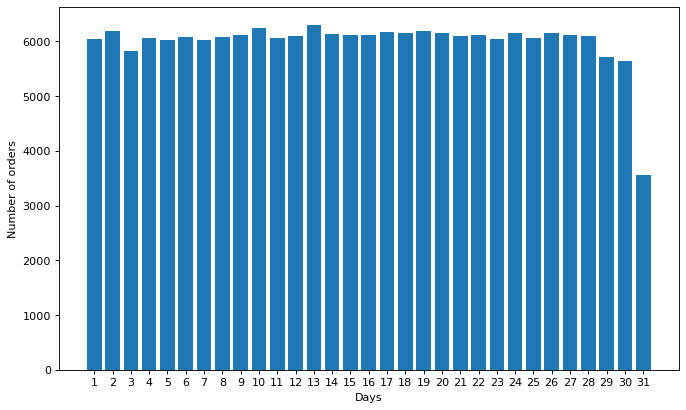

In [46]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(plot.day, plot.Product,width = .8)
plt.xlabel('Days')
plt.ylabel('Number of orders');

###### <font color=green>There is not much big difference in the no.orders through days of the month however day 13 has the highest number.</font>

###### 3.3 What City had the highest number of sales?

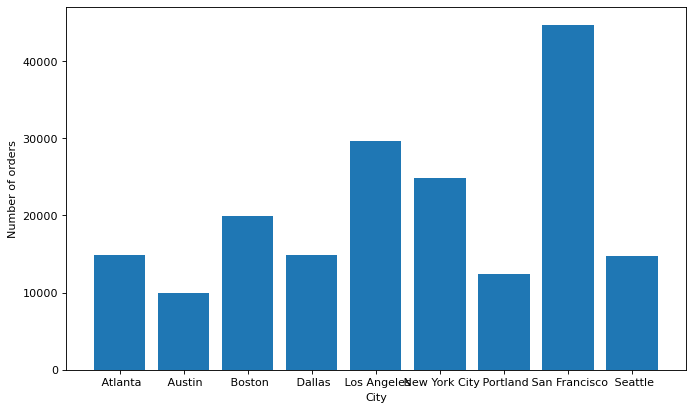

In [47]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(df.groupby(df.city).count().index , df.groupby(df.city).count().Product,width = .8)
plt.xlabel('City')
plt.ylabel('Number of orders');

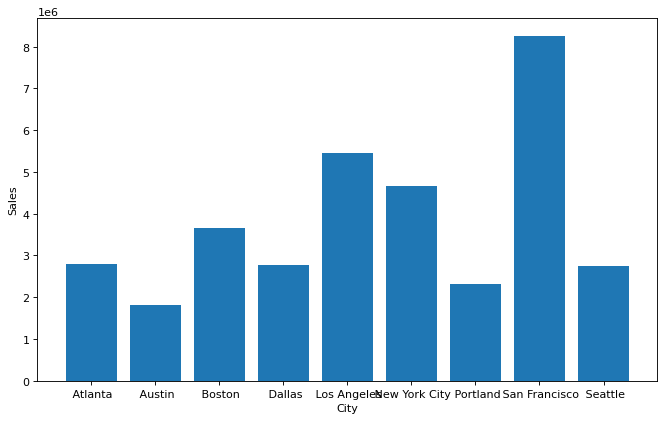

In [48]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(df.groupby(df.city).sum().index , df.groupby(df.city).sum().total_price,width = .8)
plt.xlabel('City')
plt.ylabel('Sales');

In [49]:
df.groupby(df.city).sum().total_price

city
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: total_price, dtype: float64

######  <font color=green>San Francisco got the highest number of orders and hence has the highest number of sales</font>

###### 3.4 What state had the highest number of sales?

In [50]:
df.groupby(df.state).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,year,month,day,day_of_week,hour,city,Product Type
state,,,,,,,,,,,,,,
CA,74337,74337,74337,74337,74337,74337,74337,74337,74337,74337,74337,74337,74337,74337
GA,14881,14881,14881,14881,14881,14881,14881,14881,14881,14881,14881,14881,14881,14881
MA,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934
ME,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455
NY,24876,24876,24876,24876,24876,24876,24876,24876,24876,24876,24876,24876,24876,24876
OR,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010
TX,24725,24725,24725,24725,24725,24725,24725,24725,24725,24725,24725,24725,24725,24725
WA,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732,14732


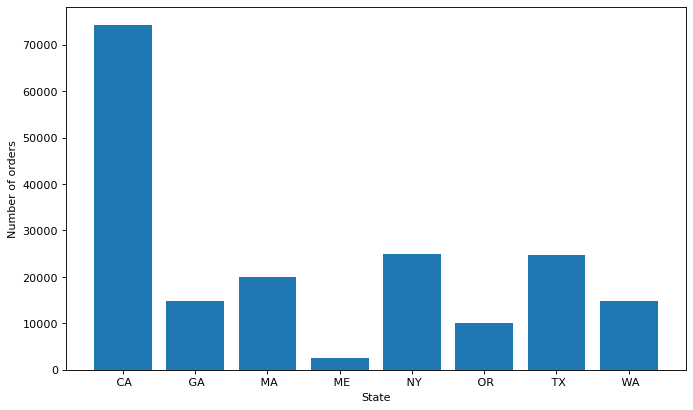

In [51]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(df.groupby(df.state).count().index , df.groupby(df.state).count().Product,width = .8)
plt.xlabel('State')
plt.ylabel('Number of orders');

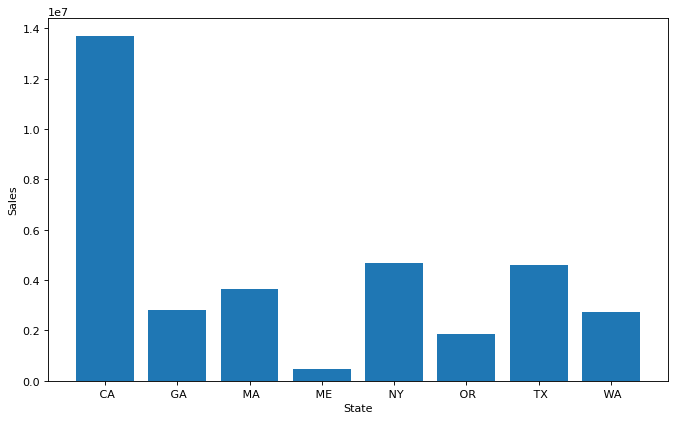

In [52]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(df.groupby(df.state).sum().index , df.groupby(df.state).sum().total_price,width = .8)
plt.xlabel('State')
plt.ylabel('Sales');

###### <font color=green>CA got the higest number of orders and sales</font>

###### 3.5 what is the best day of the week for sales







In [53]:
df.groupby(df.day_of_week).sum()

,Order ID,Quantity Ordered,Price Each,total_price,year,month,day,hour
day_of_week,,,,,,,,
Friday,6.037171e+09,29448.0,4.830796e+06,4.855938e+06,52992693,184699,406175,379231
Monday,6.163751e+09,29899.0,4.850764e+06,4.883327e+06,53598393,190462,412319,382210
Saturday,6.084391e+09,29769.0,4.873105e+06,4.904357e+06,53487348,185836,422299,382019
Sunday,6.138139e+09,29778.0,4.903227e+06,4.932170e+06,53606469,188819,419189,384250
Thursday,6.077264e+09,29662.0,4.810040e+06,4.839465e+06,53424759,185521,426891,380961
Tuesday,6.282426e+09,30724.0,5.061153e+06,5.087957e+06,54866325,193238,428748,390675
Wednesday,6.063005e+09,29799.0,4.960046e+06,4.988822e+06,53457097,184072,414864,380808


In [54]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,year,month,day,day_of_week,hour,city,state,Product Type
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,Friday,8,Dallas,TX,Cable
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,Sunday,22,Boston,MA,Headphones
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,Friday,14,Los Angeles,CA,Phone
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,Friday,14,Los Angeles,CA,Headphones
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,Tuesday,9,Los Angeles,CA,Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,17,Tuesday,20,Los Angeles,CA,Batteries
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,1,Sunday,16,San Francisco,CA,Phone
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,23,Monday,7,San Francisco,CA,Phone
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,19,Thursday,17,San Francisco,CA,Monitor


In [55]:
df.groupby(df.day_of_week).count().total_price

day_of_week
Friday       26247
Monday       26547
Saturday     26492
Sunday       26551
Thursday     26461
Tuesday      27175
Wednesday    26477
Name: total_price, dtype: int64

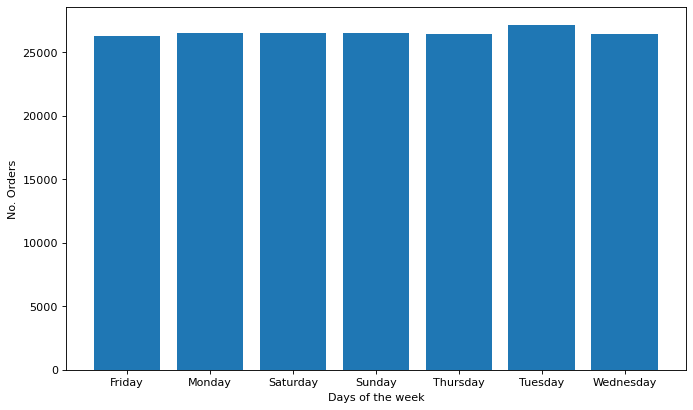

In [56]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(df.groupby(df.day_of_week).count().index , df.groupby(df.day_of_week).count().total_price,width = .8)
plt.xlabel('Days of the week')
plt.ylabel('No. Orders');

###### <font color=green>Not much difference but based on the data Tuesday is the highest</font>

###### 3.6 What time should we display adverstisement to maximize likelihood of customer's buying product?

In [57]:
no_dup = df.drop_duplicates(subset='Order ID', keep="first")

In [58]:
lala = no_dup.groupby([no_dup.year,no_dup.month,no_dup.day,no_dup.hour]).count().reset_index()

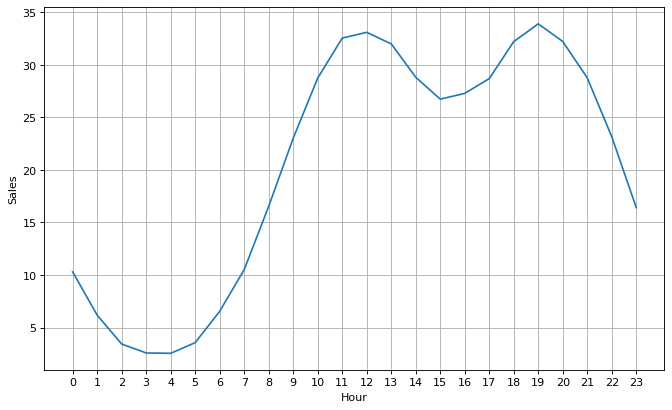

In [59]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(lala.groupby(lala.hour).mean().index , lala.groupby(lala.hour).mean().Product)
plt.xticks(np.arange(0,24))
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Sales');

######  <font color=green>Hours 11, 12, 13, 18, 19, and 20 have the highest no of orders throughout the day as general</font>

###### 3.7 What product sold the most? Why do you think it sold the most?

In [60]:
df.groupby(df.Product).count().city.sort_values()

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2065
20in Monitor                   4101
ThinkPad Laptop                4128
Macbook Pro Laptop             4724
Flatscreen TV                  4800
Google Phone                   5525
34in Ultrawide Monitor         6181
27in 4K Gaming Monitor         6230
iPhone                         6842
27in FHD Monitor               7507
Bose SoundSport Headphones    13325
Apple Airpods Headphones      15549
Wired Headphones              18882
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Lightning Charging Cable      21658
USB-C Charging Cable          21903
Name: city, dtype: int64

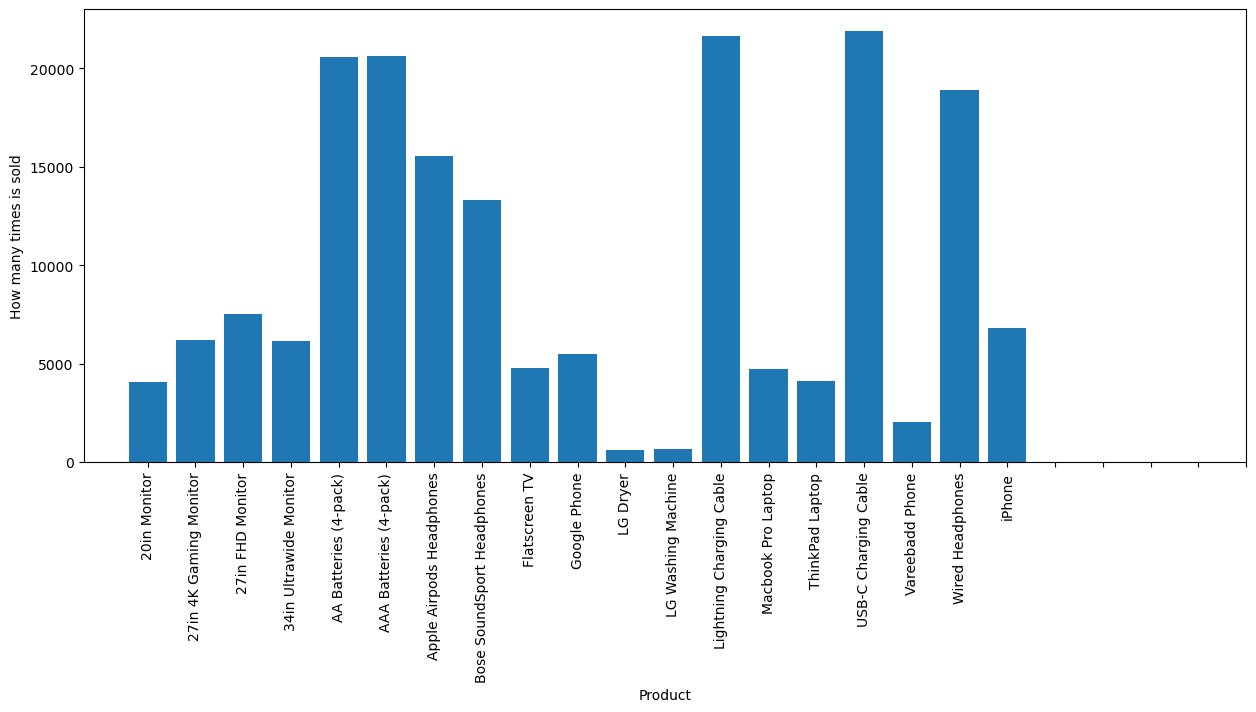

In [61]:
plt.figure(figsize=(15, 6), dpi=100)

plt.bar(df.groupby(df.Product).count().index, df.groupby(df.Product).count().city)
plt.xticks(np.arange(0,24))
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('How many times is sold');

###### <font color=green>Cables are the most items sold in our data here, the reason is being one of the items that are damaged easily</font>

###### 3.8  What products are most often sold together?

In [62]:
df_wanted = df.groupby(df['Order ID']).count()[df.groupby(df['Order ID']).count().Product != 1 ]
df_wanted = df_wanted.reset_index()
list  = df_wanted['Order ID'].values.tolist()

In [63]:
list[:10]

[141275,
 141290,
 141365,
 141384,
 141450,
 141457,
 141478,
 141550,
 141587,
 141645]

In [64]:
df_wanted

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total_price,year,month,day,day_of_week,hour,city,state,Product Type
0,141275,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,141290,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,141365,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,141384,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,141450,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,319536,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7132,319556,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7133,319584,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7134,319596,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [65]:
col_list =[]
for i in df.Product.unique():
    
    for j in df.Product.unique():
        double_list = []
        if i != j:
            double_list.append(i)
            double_list.append(j)
            col_list.append(sorted(double_list))
        else:
            pass
        
            

In [66]:
col_list

[['Bose SoundSport Headphones', 'USB-C Charging Cable'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['USB-C Charging Cable', 'Wired Headphones'],
 ['Macbook Pro Laptop', 'USB-C Charging Cable'],
 ['Lightning Charging Cable', 'USB-C Charging Cable'],
 ['27in 4K Gaming Monitor', 'USB-C Charging Cable'],
 ['AA Batteries (4-pack)', 'USB-C Charging Cable'],
 ['Apple Airpods Headphones', 'USB-C Charging Cable'],
 ['AAA Batteries (4-pack)', 'USB-C Charging Cable'],
 ['USB-C Charging Cable', 'iPhone'],
 ['Flatscreen TV', 'USB-C Charging Cable'],
 ['27in FHD Monitor', 'USB-C Charging Cable'],
 ['20in Monitor', 'USB-C Charging Cable'],
 ['LG Dryer', 'USB-C Charging Cable'],
 ['ThinkPad Laptop', 'USB-C Charging Cable'],
 ['USB-C Charging Cable', 'Vareebadd Phone'],
 ['LG Washing Machine', 'USB-C Charging Cable'],
 ['34in Ultrawide Monitor', 'USB-C Charging Cable'],
 ['Bose SoundSport Headphones', 'USB-C Charging Cable'],
 ['Bose SoundSport Headphones', 'Google Phone'],
 ['Bose SoundSport Headpho

In [67]:
dummy_col_names = []
for i in col_list:
    name = i[0]+'_'+i[1]
    if name not in dummy_col_names:
        dummy_col_names.append(name)

In [68]:
df_2 = df.copy()
df_2.drop(['Quantity Ordered', 'Price Each', 'Order Date','Purchase Address', 'total_price', 'year',
          'month', 'day','day_of_week', 'hour', 'city', 'state'], axis=1, inplace=True)

In [69]:
for i in dummy_col_names :
    df_2[i] = 0

In [70]:
couple_list = {}
for i in list :
    collector_list = []
    df_product = df[df['Order ID'] == i]
    for j in df_product.Product:
        collector_list.append(j)
    couple_list[i] = collector_list

In [71]:
couple_list

{141275: ['USB-C Charging Cable', 'Wired Headphones'],
 141290: ['Apple Airpods Headphones', 'AA Batteries (4-pack)'],
 141365: ['Vareebadd Phone', 'Wired Headphones'],
 141384: ['Google Phone', 'USB-C Charging Cable'],
 141450: ['Google Phone', 'Bose SoundSport Headphones'],
 141457: ['iPhone', 'Apple Airpods Headphones'],
 141478: ['Google Phone', 'Apple Airpods Headphones'],
 141550: ['iPhone', 'Apple Airpods Headphones', 'Wired Headphones'],
 141587: ['USB-C Charging Cable', 'Apple Airpods Headphones'],
 141645: ['Lightning Charging Cable', 'Wired Headphones'],
 141738: ['iPhone', 'Lightning Charging Cable'],
 141782: ['27in FHD Monitor', 'Bose SoundSport Headphones'],
 141789: ['Google Phone', 'USB-C Charging Cable'],
 141795: ['iPhone', 'Wired Headphones'],
 141809: ['Google Phone', 'USB-C Charging Cable'],
 141843: ['AA Batteries (4-pack)', 'AAA Batteries (4-pack)'],
 141900: ['Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'],
 141901: ['Google Phone', 'USB-C Chargi

In [72]:
for z in df_2 : 
    for i, j in couple_list.items():
        
        if z.split('_')[0] in j  and z.split('_')[-1] in j :
            df_2.loc[df_2['Order ID'] == i, z ] = 1

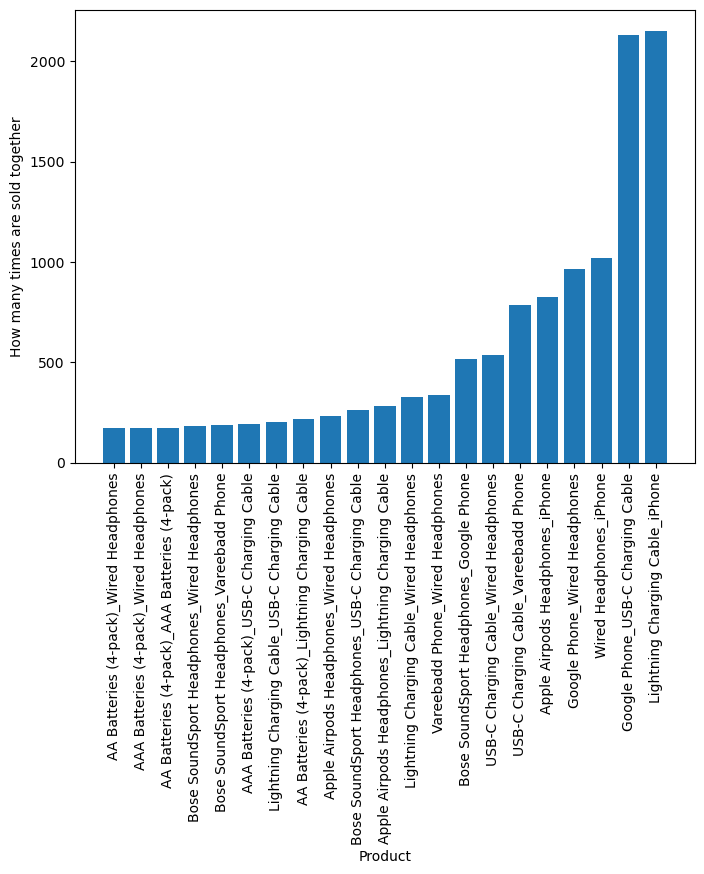

In [73]:
plt.figure(figsize=(8, 6), dpi=100)

plt.bar(df_2[df_2.columns[3:]].sum().sort_values()[150:].index, df_2[df_2.columns[3:]].sum().sort_values()[150:].values)

plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('How many times are sold together');

##### Another approach

In [74]:
couple_list1 = []
for i in list :
    collector_list = []
    df_product = df[df['Order ID'] == i]
    for j in df_product.Product:
        collector_list.append(j)
    couple_list1.append(collector_list)

In [75]:
couple_list1

[['USB-C Charging Cable', 'Wired Headphones'],
 ['Apple Airpods Headphones', 'AA Batteries (4-pack)'],
 ['Vareebadd Phone', 'Wired Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['Google Phone', 'Bose SoundSport Headphones'],
 ['iPhone', 'Apple Airpods Headphones'],
 ['Google Phone', 'Apple Airpods Headphones'],
 ['iPhone', 'Apple Airpods Headphones', 'Wired Headphones'],
 ['USB-C Charging Cable', 'Apple Airpods Headphones'],
 ['Lightning Charging Cable', 'Wired Headphones'],
 ['iPhone', 'Lightning Charging Cable'],
 ['27in FHD Monitor', 'Bose SoundSport Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['iPhone', 'Wired Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['AA Batteries (4-pack)', 'AAA Batteries (4-pack)'],
 ['Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'],
 ['Google Phone', 'USB-C Charging Cable'],
 ['Vareebadd Phone', 'Wired Headphones'],
 ['34in Ultrawide Monitor', 'Lightning Charging Cable'],
 ['USB-C Charging Cable', 'Wired 

In [76]:
from itertools import combinations
from collections import Counter

count = Counter() # To count starting from 0
for subset in couple_list1:
    
    count.update(combinations(subset , 2)) # combinations makes every possibole 2 combination of the subset
                                           # count.update it count the occurance of combination(which will be 1) and update it to count(Add)

for key,value in count.most_common(10):    # most_common is a method used with Counter only to get top counts
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [77]:
keys=[]
values=[]
for key,value in count.most_common(10):  
    keylist = []
    string = ''
    for i in key:
        string = string+i+' & '
    keys.append(string[:-2])
    values.append(value)

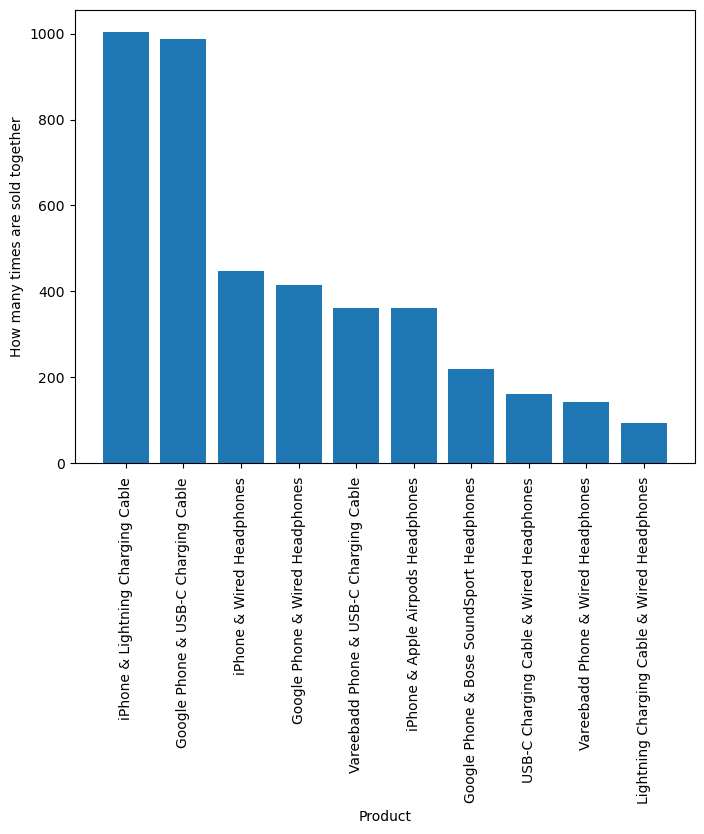

In [78]:
plt.figure(figsize=(8, 6), dpi=100)

plt.bar(keys, values)

plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('How many times are sold together');

###### <font color=green>iPhone with Lightning Charging Cable were the most first 2 items sold together </font>
###### <font color=green>Google Phone with USB-C Charging Cable were the most second 2  items sold together</font>

###### 3.9 What product types got the highest sales?

In [79]:
df.groupby(df['Product Type']).sum().total_price

Product Type
Batteries     1.988592e+05
Cable         6.335954e+05
Dryer         3.876000e+05
Headphones    3.941194e+06
Laptop        1.216756e+07
Machine       3.996000e+05
Monitor       6.377229e+06
Phone         8.940700e+06
TV            1.445700e+06
Name: total_price, dtype: float64

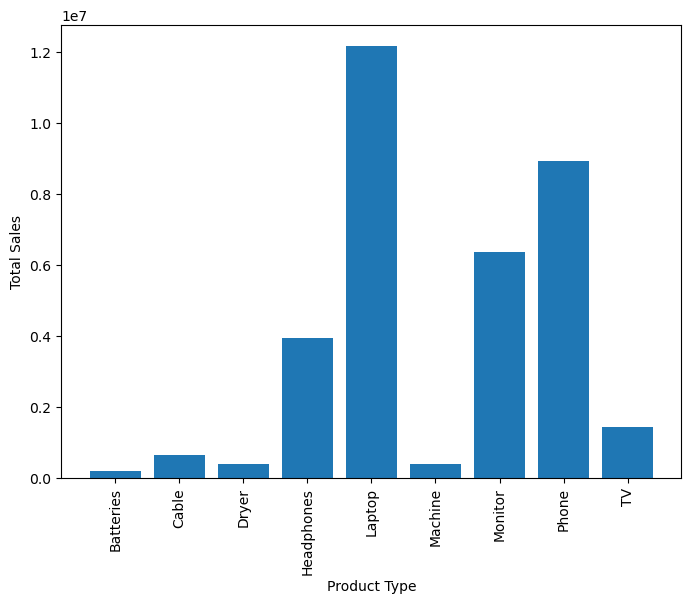

In [80]:
plt.figure(figsize=(8, 6), dpi=100)

plt.bar(df.groupby(df['Product Type']).sum().total_price.index, df.groupby(df['Product Type']).sum().total_price.values)

plt.xticks(rotation=90)
plt.xlabel('Product Type')
plt.ylabel('Total Sales');

###### <font color=green> Laptops come as the top product type in sales </font>

###### <font color=green> Phones come in second place as the second highest product type in sales then comes Monitors </font>


------------------------------------------------

## <a id='another_cell4'> <div class="alert alert-success">Findings</div> </a>



✅ December is the highest month in sales with 4.6 million dollars.

✅ There is not much big difference in the number of orders through days of the month however day 13 has the highest number.

✅ San Francisco got the highest number of orders and hence has the highest number of sales.

✅ California got the higest number of orders and sales.

✅ No big difference in sales through weekdays but based on the data Tuesday is the highest.

✅ Hours from 11 to 13 and 18 to 20 have the highest no of orders throughout the day as general.

✅ Cables are the most items sold in our data here, and that's because cables are damaged easily.

✅ iPhone with Lightning Charging Cable were the most first 2 items sold together & Google Phone with USB-C Charging Cable were 
    the most second 2 items sold together.

✅ Laptops come as the top product type in sales then Phones come in second place as the second highest product type in sales then comes Monitors.